#Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/My Drive/AI ML Training/Logistic Regression Implementation

/content/drive/My Drive/AI ML Training/Logistic Regression Implementation


In [4]:
ls

 diabetes.csv
'Diabetes Prediction using Logistic Regression.ipynb'
'Logistic Regression using sklearn - Iris data.ipynb'


#Loading data

Dataset - https://www.kaggle.com/uciml/pima-indians-diabetes-database/kernels

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Selecting Features

In [11]:
X = data.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
Y = data.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
Y.name

'Outcome'

#Splitting Data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 0)
print(" X_train : ",X_train.shape," X_test : ",X_test.shape," Y_train : ",Y_train.shape," Y_test : ",Y_test.shape)

 X_train :  (576, 8)  X_test :  (192, 8)  Y_train :  (576,)  Y_test :  (192,)


#Model Development and Prediction

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LogisticRegression?

In [41]:
#model_lr = LogisticRegression(class_weight={0:1,1:99},max_iter=500) # When this is used accuracy is 35.xxx%
"""model_lr = LogisticRegression() #accuracy is 71.354%
Confusion Matrix
array([[106,  24],
       [ 31,  31]])"""
"""model_lr = LogisticRegression(max_iter=500) # Accuracy is 73.95833% At random_state = 45 (train_test_split)
                                               # Accuracy is 80.xx(see below) At random_state = 0 (train_test_split)
Confusion Matrix
array([[110,  20],
       [ 30,  32]]) """
#model_lr = LogisticRegression(max_iter=1000) # Accuracy is 73.95833%

'model_lr = LogisticRegression(max_iter=500) # Accuracy is 73.95833% At random_state = 45 (train_test_split)\nConfusion Matrix\narray([[110,  20],\n       [ 30,  32]]) '

In [42]:
model_lr = LogisticRegression(max_iter=500)

In [43]:
hist = model_lr.fit(X_train,Y_train)

In [44]:
y_pred = model_lr.predict(X_test)

#Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

In [46]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.8020833333333334

In [48]:
cnf_matrix = confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

###Vizualising Confuion Matrix using Heat Maps

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.heatmap?

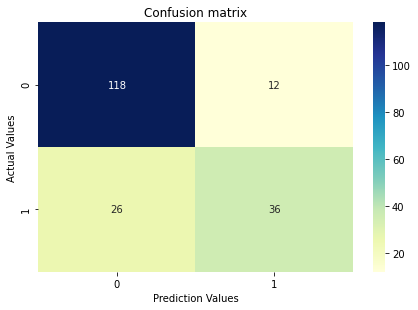

In [50]:
class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# cmap : matplotlib colormap name or object, or list of colors
# annot : bool or rectangular dataset, optional
#   If True, write the data value in each cell. If an array-like with the
#   same shape as ``data``, then use this to annotate the heatmap instead
#   of the data
# fmt : string, optional
#  String formatting code to use when adding annotations.
# fmt parameter allows to add string (text) values on the cell.

ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Prediction Values')
plt.ylabel('Actual Values')

plt.show()

In [51]:
print("Accuracy : ",accuracy_score(Y_test,y_pred))
print("Precision : ",precision_score(Y_test,y_pred))
print("Recall : ",recall_score(Y_test,y_pred))

Accuracy :  0.8020833333333334
Precision :  0.75
Recall :  0.5806451612903226


#####ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

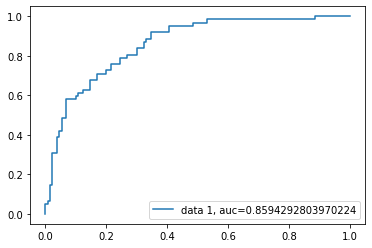

In [52]:
y_pred_proba = model_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Disadvantages of Logistic Regression

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

#Source

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python